In [158]:
import numpy as np
import matplotlib.pylab as plt
from numpy import sin, cos, tan, exp, pi, e

# Defining the variables and equations of motion

In [38]:
X_LABEL = "x"
Y_LABEL = "v"

def DXDT(x, y):
    return(y)
    
def DYDT(x, y):
    return(-x)

# Rendering the phase portrait

In [39]:
# Setting plotting defaults 
X_MIN = -6
X_MAX = 6
Y_MIN = -6
Y_MAX = 6
RES = 0.5
Q_SCALE = 2.0

In [40]:
# Finding critical points

from scipy.optimize import fsolve
from itertools import product

## Needed for critical point solver, DO NOT CHANGE
def DDT(arg):
    x, y = arg
    return(DXDT(x, y), DYDT(x, y))

#
epsilon = 0.00001
res_c = 0.1

x = np.arange(X_MIN, X_MAX, res_c)
y = np.arange(Y_MIN, Y_MAX, res_c)
X, Y = np.meshgrid(x, y)

cp_x = []
cp_y = []
for x_0, y_0 in product(x, y):
    x_c, y_c =  fsolve(DDT, (x_0, y_0))
    if len(cp_x) == 0:
        cp_x.append(x_c)
        cp_y.append(y_c)
    else:
        d = np.sqrt((np.array(cp_x) - x_c)**2 + (np.array(cp_x) - y_c)**2)
        if (d > epsilon).all():
            cp_x.append(x_c)
            cp_y.append(y_c)

print("Critical points found at:")            
print([i for i in zip(cp_x,cp_y)])

Critical points found at:
[(0.0, 0.0)]


In [50]:
# Creating the Grid for plotting
x = np.arange(X_MIN, X_MAX, RES)
y = np.arange(Y_MIN, Y_MAX, RES)
X, Y = np.meshgrid(x, y)

# Caculating the change vectors
dxdt = Q_SCALE*DXDT(X, Y)
dydt = Q_SCALE*DYDT(X, Y)

Text(0, 0.5, 'v')

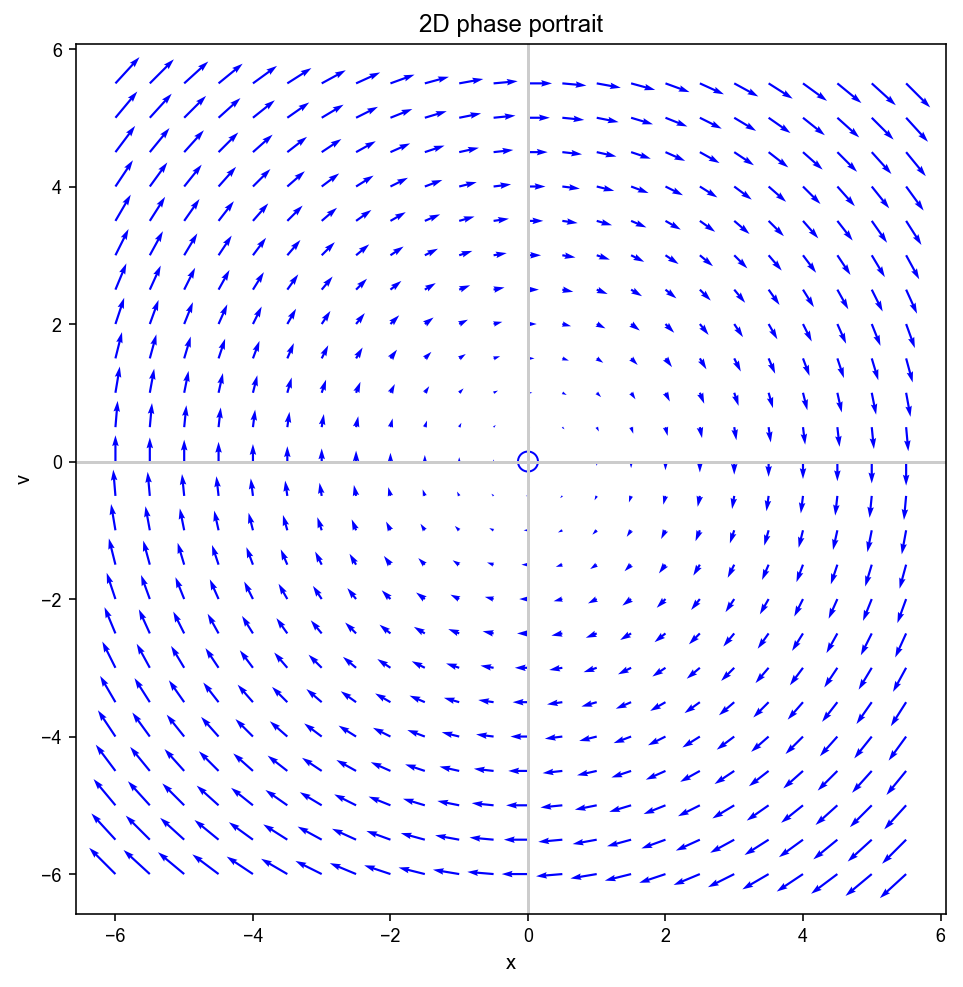

In [42]:
# Plotting the phase diagram

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1,aspect='equal')

ax.axhline(0, color='.8')
ax.axvline(0, color='.8')
ax.scatter(cp_x, cp_y, s=100, color='blue', marker='o', facecolor='none')
ax.quiver(x, y, dxdt, dydt, color='blue')

ax.set_title("2D phase portrait")
ax.set_xlabel(X_LABEL)
ax.set_ylabel(Y_LABEL)

# Approximating dynamics near the critical points

In [43]:
def linearize(x, y, dx_func, dy_func, D=0.001):
    L = np.array(
        [[(dx_func(x+D,y) - dx_func(x-D,y)) / (2*D), (dx_func(x,y+D) - dx_func(x,y-D)) / (2*D)], 
        [(dy_func(x+D,y) - dy_func(x-D,y)) / (2*D), (dy_func(x,y+D) - dy_func(x,y-D)) / (2*D)]]
    )
    return(L)

def prettyprint_eig(M):
    from scipy.linalg import eig
    vals, mat = eig(M)
    for i in range(len(vals)):
        print(f"\tEigenvalue {i+1} is {vals[i]:.3}, with vector ({mat[0,i]:.3}, {mat[1,i]:.3})")

In [44]:
Ls = []
for i, (x, y) in enumerate(zip(cp_x, cp_y)):
    L = linearize(x, y, DXDT, DYDT)
    Ls.append(L)
    print(f" At critical point #{i}, ({x}, {y}), the functions are approximated by \n {L}\n")
    

 At critical point #0, (0.0, 0.0), the functions are approximated by 
 [[ 0.  1.]
 [-1.  0.]]



In [45]:
for i, (L, x, y) in enumerate(zip(Ls, cp_x, cp_y)):
    print(f"At critical point #{i}, ({x}, {y}),")
    prettyprint_eig(Ls[i])
    print("")

At critical point #0, (0.0, 0.0),
	Eigenvalue 1 is 1j, with vector ((0.707+0j), 0.707j)
	Eigenvalue 2 is -1j, with vector ((0.707-0j), -0.707j)



# Simulating solutions to the system 

In [151]:
X_0 = 0 # starting x
Y_0 = 1 # starting y
T_f = 10 # final time

DT = 0.1

## Euclid's method

In [165]:
def Euclid_next(x, y, dxdt, dydt, dt=DT):
    x_next = x + dxdt(x,y)*dt
    y_next = y + dydt(x,y)*dt
    return(x_next, y_next)

def simulate(x_0, y_0, t_f, simulation_function, dt=DT):
    X_solution = [x_0]
    Y_solution = [y_0]
    T = np.arange(dt, t_f, dt)
    for t in T[1:]:
        x_previous, y_previous = X_solution[-1], Y_solution[-1]
        x_next, y_next = simulation_function(x_previous, y_previous, DXDT, DYDT, dt=dt)
        X_solution.append(x_next)
        Y_solution.append(y_next)
    return (T, X_solution, Y_solution)

### Simulating Euler's method

In [166]:
T, X_euclid, Y_euclid = simulate(X_0, Y_0, T_f, Euler_next)

In [167]:
X_euclid[:10]

[0,
 0.1,
 0.2,
 0.29900000000000004,
 0.396,
 0.49001,
 0.58006,
 0.6652099,
 0.7445592000000001,
 0.8172564010000001]

In [168]:
Y_euclid[:10]

[1,
 1.0,
 0.99,
 0.97,
 0.9400999999999999,
 0.9005,
 0.851499,
 0.793493,
 0.72697201,
 0.65251609]

### Graphing the simulation

In [169]:
def plot_solution(T, X_solutions, Y_solutions, colors=['.k']):
    fig, (ax, ax_x, ax_y) = plt.subplots(figsize=(12,4), ncols=3)

    ax.set_aspect('equal')
    ax.axhline(0, color='.8')
    ax.axvline(0, color='.8')
    ax.scatter(cp_x, cp_y, s=100, color='blue', marker='o', facecolor='none')
    ax.quiver(x, y, dxdt, dydt, color='blue')

    ax.set_title("2D phase portrait")
    ax.set_xlabel(X_LABEL)
    ax.set_ylabel(Y_LABEL)
    
    assert len(X_solutions) == len(Y_solutions)
    if len(colors) != len(X_solutions):
        colors = len(X_solutions) * colors
    for X_solution, Y_solution, color in zip(X_solutions, Y_solutions, colors):
        ax.plot(X_solution, Y_solution, color=color)
        ax.scatter(X_solution[0], Y_solution[0], color='g', zorder=10)
        ax.scatter(X_solution[-1], Y_solution[-1], color='r', zorder=10)

        ax_x.set_aspect('equal')
        ax_x.plot(T, X_solution, color=color)
        ax_x.axhline(0, color='.8', zorder=-1)
        ax_x.scatter(T[0], X_solution[0], color='g', zorder=10)
        ax_x.scatter(T[-1], X_solution[-1], color='r', zorder=10)
        ax_x.set_ylabel(X_LABEL)
        ax_x.set_xlabel("Time")

        ax_y.set_aspect('equal')
        ax_y.plot(T, Y_solution, color=color)
        ax_y.axhline(0, color='.8', zorder=-1)
        ax_y.scatter(T[0], Y_solution[0], color='g', zorder=10)
        ax_y.scatter(T[-1], Y_solution[-1], color='r', zorder=10)
        ax_y.set_ylabel(Y_LABEL)
        ax_y.set_xlabel("Time")

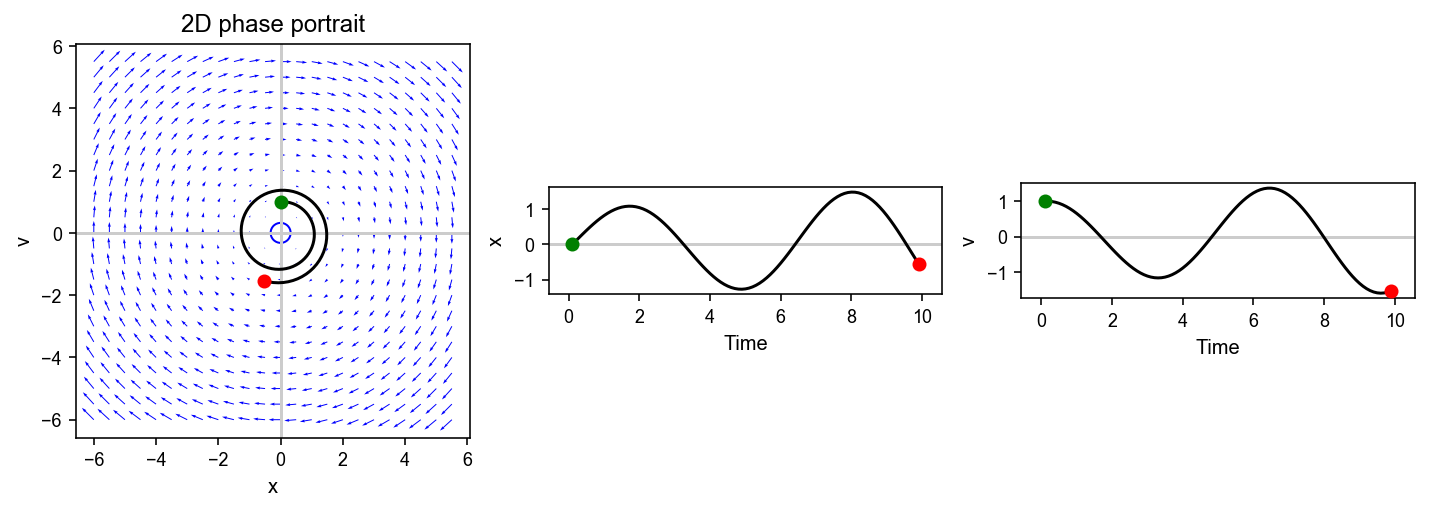

In [170]:
plot_solution(T, [X_euclid], [Y_euclid], colors=['k'])

## More advanced methods

In [173]:
X_0 = 0 # starting x
Y_0 = 1 # starting y
T_f = 10 # final time

DT = 0.01

In [174]:
def advanced_next(x, y, dxdt, dydt, dt=DT):
    x_test = x + dxdt(x,y)*dt
    y_test = y + dydt(x,y)*dt
    
    x_next = x + dxdt((x + x_test)/2., (y + y_test)/2)*dt
    y_next = y + dydt((x + x_test)/2., (y + y_test)/2)*dt
    
    return(x_next, y_next)

### Simulating 

In [175]:
T, X_Euclid, Y_Euclid = simulate(X_0, Y_0, T_f, Euclid_next)
T, X_adv, Y_adv = simulate(X_0, Y_0, T_f, advanced_next)

### Graphing the simulation

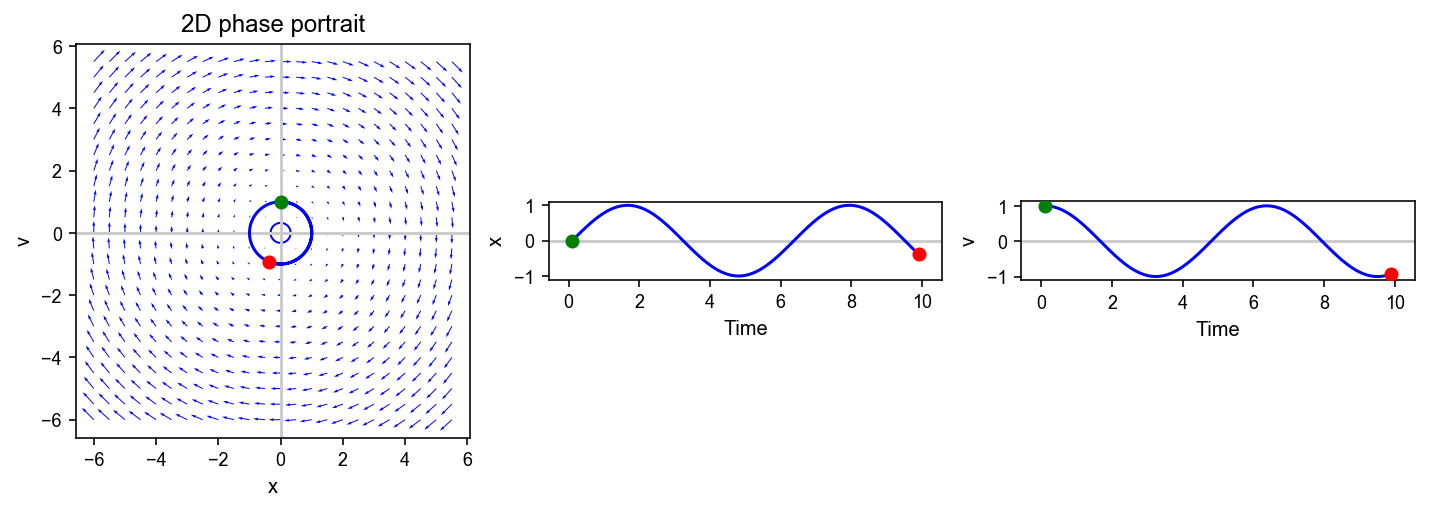

In [178]:
plot_solution(T, [X_adv], [Y_adv], colors=['b'])

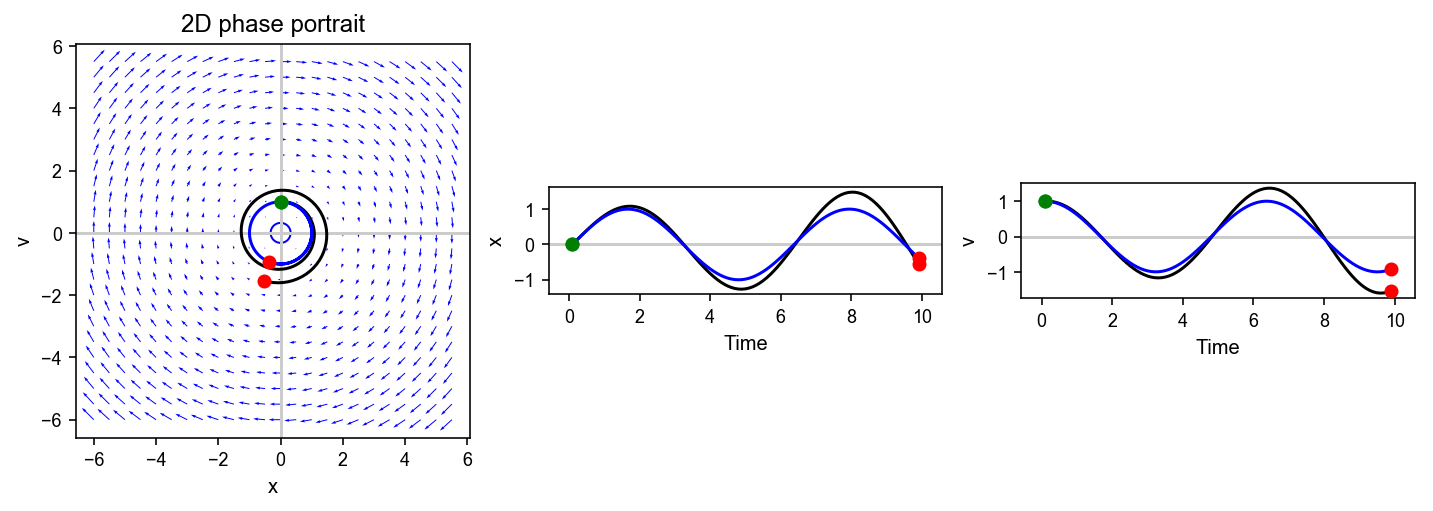

In [179]:
plot_solution(T, [X_Euclid, X_adv], [Y_Euclid, Y_adv], colors=['k', 'b'])